In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [34]:
# Load the dataset
data = pd.read_csv('Book1.csv')

In [35]:
# Convert categorical data to numerical data
data['Health_Status'] = data['Health_Status'].map({'Healthy': 1, 'Sick': 0})

In [36]:
# Handling missing values (if any)
data = data.dropna()

In [37]:
data.isna().sum()

Temperature      0
Humidity         0
Light_Hours      0
Hen_Age_weeks    0
Feed_Quantity    0
Health_Status    0
Hen_Count        0
Egg_count        0
dtype: int64

In [38]:
# Define features and target variable
X = data.drop(columns=['Egg_count'])
y = data['Egg_count']

In [17]:
data.head()

,Temperature,Humidity,Light_Hours,Hen_Age_weeks,Feed_Quantity,Health_Status,Hen_Count,Egg_count
0,28.1,65.3,15.997205,17,0.075,1,2021,3
1,26.7,68.2,13.935016,17,0.075,1,2002,3
2,23.5,72.1,15.508329,17,0.075,1,1980,3
3,29.9,60.8,12.014510,17,0.075,1,2019,3
4,22.2,73.9,12.643045,17,0.075,1,1998,3


In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [25]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2711.958904109589


In [27]:
from sklearn.metrics import r2_score

# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)

print(f"R-squared value: {r_squared:.4f}")


R-squared value: 0.9853


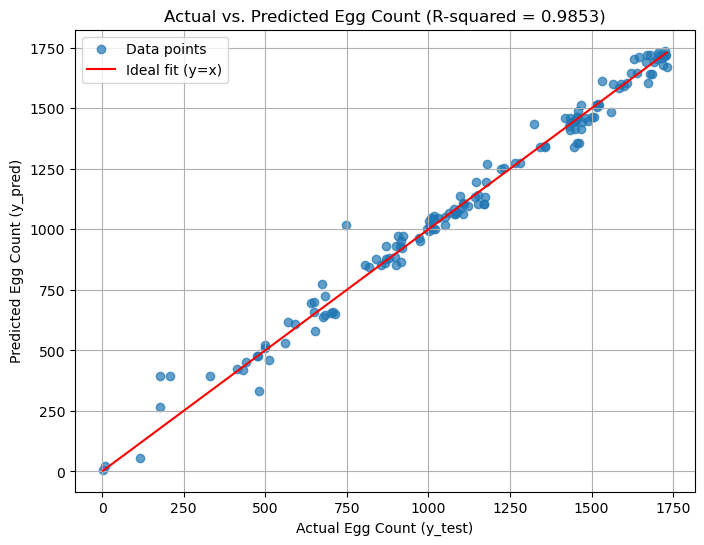

In [47]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Data points")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label="Ideal fit (y=x)")

# Add labels, title, and legend
plt.xlabel("Actual Egg Count (y_test)")
plt.ylabel("Predicted Egg Count (y_pred)")
plt.title(f"Actual vs. Predicted Egg Count (R-squared = {r_squared:.4f})")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [29]:
# Example of making predictions on new data
new_data = pd.DataFrame({
    'Temperature': [28.1],
    'Humidity': [65.1],
    'Light_Hours': [15.9],
    'Hen_Age_weeks': [17],
    'Feed_Quantity': [0.075],
    'Health_Status': [1],  # Healthy
    'Hen_Count': [2021]
})

In [31]:
new_prediction = model.predict(new_data)
print(f"Predicted Egg Count for new data: {new_prediction[0]}")

Predicted Egg Count for new data: 3.0
